<a href="https://colab.research.google.com/github/xylewis/Form-recognition/blob/master/%E8%A1%A8%E6%A0%BC%E8%AF%86%E5%88%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
h_=H
print(h_)
array_h_=np.array(h_)
index_h_=np.where(array_h_==0)[0]
print(index_h_)
# print(len(index_h_))

interval=np.array([0],dtype=int)
split=np.array([],dtype=int)

for index in range(len(index_h_)):
  if index_h_[index]-index_h_[index-1] > 1.5:
    interval=np.append(interval, index-1)
    interval=np.append(interval, index)
  if index == len(index_h_)-1 and interval[-1] != index:
    interval=np.append(interval, index)

for index in range(len(interval)):
  if interval[index]-interval[index-1]+1 >2 :   # 黑色像素长度阈值的确定直接决定分割效果
    split=np.append(split,interval[index-1]+np.ceil((interval[index]-interval[index-1])/2).astype(int))

print(split)

for i in range(len(split)):
  split[i]=index_h_[split[i]]
  print(split)


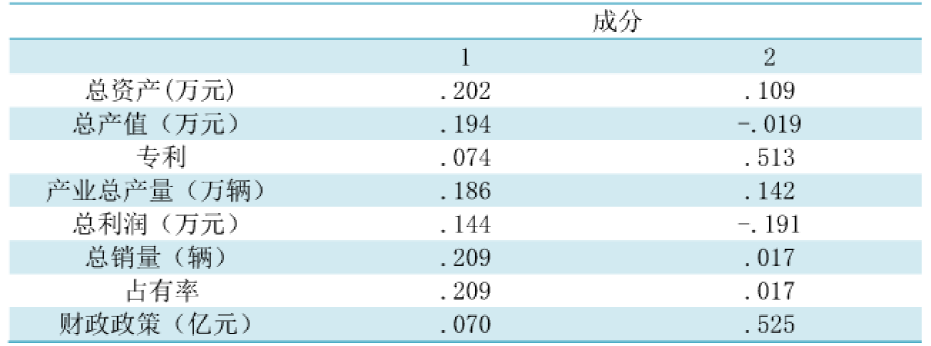

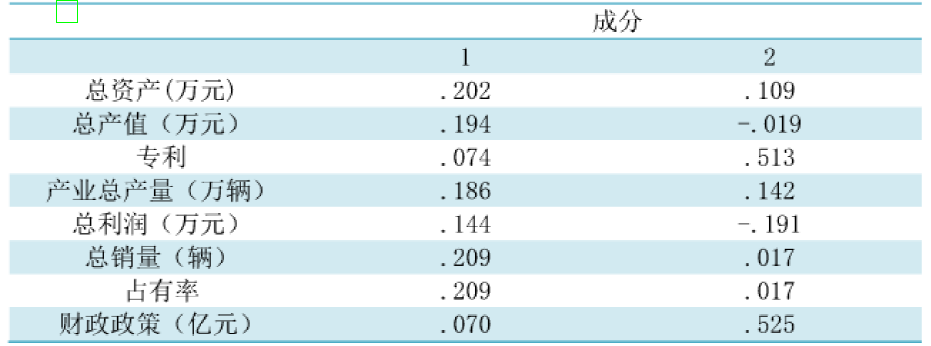

In [0]:
test_img=origineImage
cv2_imshow(test_img)
cv2.rectangle(test_img, (56,0), (77,22), (0,255,0), 1)
cv2_imshow(test_img)


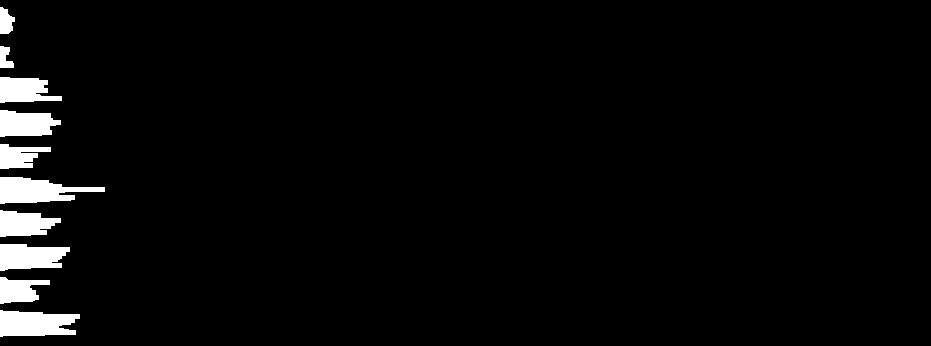

40 : 72
[231 616 853]


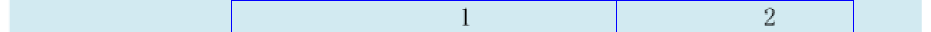

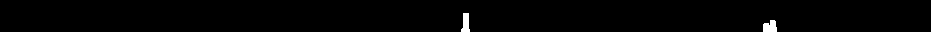

72 : 106
[ 43 337 617 755 862]


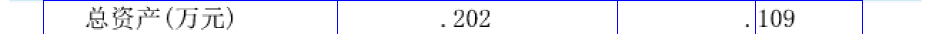

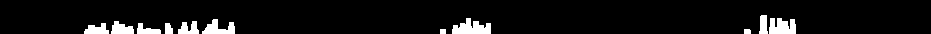

106 : 140
[ 37 155 339 451 614 866]


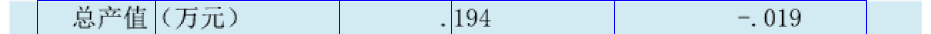

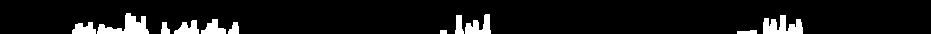

140 : 173
[ 69 313 617 862]


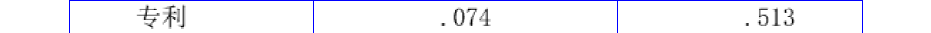

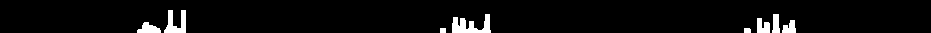

173 : 240
[ 23 352 451 614 864]


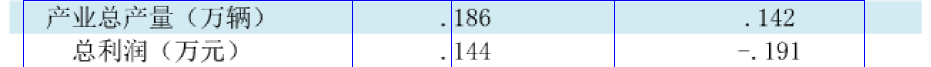

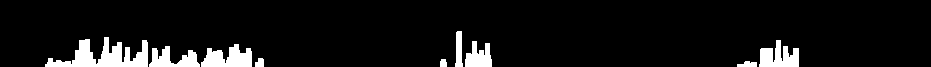

240 : 340
[ 30 346 618 862]


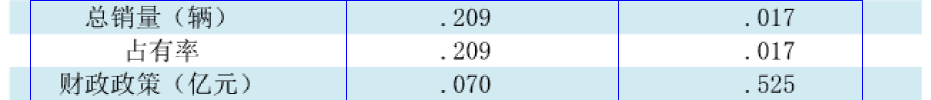

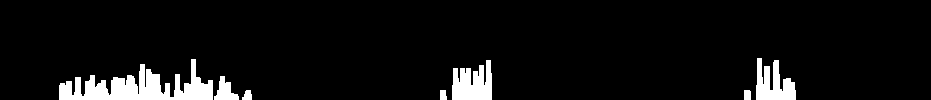

In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

'''水平投影'''
def getHProjection(image):
    hProjection = np.zeros(image.shape,np.uint8)
    #图像高与宽
    (h,w)=image.shape
    #长度与图像高度一致的数组
    h_ = [0]*h
    #循环统计每一行白色像素的个数
    for y in range(h):
        for x in range(w):
            if image[y,x] == 255:
                h_[y]+=1
    #绘制水平投影图像
    for y in range(h):
        for x in range(h_[y]):
            hProjection[y,x] = 255

    kernel = np.ones((5,5), np.uint8)

    #图像膨胀处理
    hProjection = cv2.dilate(hProjection, kernel)

    cv2_imshow(hProjection)
 
    return h_ ,hProjection
 
def getVProjection(image):
    vProjection = np.zeros(image.shape,np.uint8);
    #图像高与宽
    (h,w) = image.shape
    #长度与图像宽度一致的数组
    w_ = [0]*w
    #循环统计每一列白色像素的个数
    for x in range(w):
        for y in range(h):
            if image[y,x] == 255:
                w_[x]+=1
    #绘制垂直平投影图像
    for x in range(w):
        for y in range(h-w_[x],h):
            vProjection[y,x] = 255
    # cv2_imshow(vProjection)
    kernel = np.ones((5,5), np.uint8)

    #图像膨胀处理
    vProjection = cv2.dilate(vProjection, kernel)

    return w_ , vProjection

def get_split(h_):
  # print(h_)
  array_h_=np.array(h_)
  index_h_=np.where(array_h_==0)[0]
  # print(index_h_)
  interval=np.array([0],dtype=int)
  split=np.array([],dtype=int)

  for index in range(len(index_h_)):
    if index_h_[index]-index_h_[index-1] > 1.5:
      interval=np.append(interval, index-1)
      interval=np.append(interval, index)
    if index == len(index_h_)-1 and interval[-1] != index:
      interval=np.append(interval, index)

  # print(interval)

  for index in range(len(interval)):
    if interval[index]-interval[index-1]+1 >10 :   # 黑色像素长度阈值的确定直接决定分割效果
      split=np.append(split,interval[index-1]+np.ceil((interval[index]-interval[index-1])/2).astype(int))

  for i in range(len(split)):
    split[i]=index_h_[split[i]]

  # print(split)
  return split
 
img_path='/content/drive/My Drive/img/form.png'

if __name__ == "__main__":
    #读入原始图像
    origineImage = cv2.imread(img_path)
    # 图像灰度化   
    image = cv2.cvtColor(origineImage,cv2.COLOR_BGR2GRAY,)
    # cv2_imshow(image)
    # 将图片二值化
    retval, img = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
    # cv2_imshow(img)
    #图像高与宽
    (h,w)=img.shape
    #水平投影
    H,H_projection = getHProjection(img)
    H_split=get_split(H)

    # #分割行，分割之后再进行列分割并保存分割位置
    for i in range(len(H_split)-1):
        #获取行图像
        cropImg = img[H_split[i]:H_split[i+1], 0:w]
        crop_orgimg=origineImage[H_split[i]:H_split[i+1], 0:w]
        (crop_h,crop_w)=cropImg.shape
        print(H_split[i],':',H_split[i+1])
        W,W_projection=getVProjection(cropImg)
        W_split=get_split(W)
        print(W_split)
        for j in range(len(W_split)-1) :
          cv2.rectangle(crop_orgimg, (W_split[j],0), (W_split[j+1],crop_h), (255,0,0), 1)
        cv2_imshow(crop_orgimg)
        cv2_imshow(W_projection)
        print('=====================================================================================')


In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

'''水平投影'''
def getHProjection(image):
    hProjection = np.zeros(image.shape,np.uint8)
    #图像高与宽
    (h,w)=image.shape
    #长度与图像高度一致的数组
    h_ = [0]*h
    #循环统计每一行白色像素的个数
    for y in range(h):
        for x in range(w):
            if image[y,x] == 255:
                h_[y]+=1
    #绘制水平投影图像
    for y in range(h):
        for x in range(h_[y]):
            hProjection[y,x] = 255
    cv2_imshow(hProjection)
 
    return h_
 
def getVProjection(image):
    vProjection = np.zeros(image.shape,np.uint8);
    #图像高与宽
    (h,w) = image.shape
    #长度与图像宽度一致的数组
    w_ = [0]*w
    #循环统计每一列白色像素的个数
    for x in range(w):
        for y in range(h):
            if image[y,x] == 255:
                w_[x]+=1
    #绘制垂直平投影图像
    for x in range(w):
        for y in range(h-w_[x],h):
            vProjection[y,x] = 255
    #cv2.imshow('vProjection',vProjection)
    return w_
 
img_path='/content/drive/My Drive/img/form.png'

if __name__ == "__main__":
    #读入原始图像
    origineImage = cv2.imread(img_path)

    # 图像灰度化   
    image = cv2.cvtColor(origineImage,cv2.COLOR_BGR2GRAY,)
    # cv2_imshow(image)

    # 将图片二值化
    retval, img = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
    # cv2_imshow(img)

    #图像高与宽
    (h,w)=img.shape
    Position = []
    #水平投影
    H = getHProjection(img)

    # print(H)
    # print(type(H))
 
    start = 0
    H_Start = []
    H_End = []
    #根据水平投影获取垂直分割位置
    for i in range(len(H)):
        if H[i] > 0 and start ==0:
            H_Start.append(i)
            start = 1
        if H[i] <= 0 and start == 1:
            H_End.append(i)  
            start = 0
    #分割行，分割之后再进行列分割并保存分割位置
    for i in range(len(H_Start)):
        #获取行图像
        cropImg = img[H_Start[i]:H_End[i], 0:w]
        print('asd')
        cv2_imshow(cropImg)
        #对行图像进行垂直投影
        W = getVProjection(cropImg)
        Wstart = 0
        Wend = 0
        W_Start = 0
        W_End = 0
        for j in range(len(W)):
            if W[j] > 0 and Wstart ==0:
                W_Start =j
                Wstart = 1
                Wend=0
            if W[j] <= 0 and Wstart == 1:
                W_End =j
                Wstart = 0
                Wend=1
            if Wend == 1:
                Position.append([W_Start,H_Start[i],W_End,H_End[i]])
                Wend =0
    #根据确定的位置分割字符
    for m in range(len(Position)):
        cv2.rectangle(origineImage, (Position[m][0],Position[m][1]), (Position[m][2],Position[m][3]), (0 ,229 ,238), 1)
    cv2_imshow(origineImage)
    cv2.waitKey(0)

In [0]:
pip install pygame

In [0]:
HProjection=np.zeros(img.shape,np.uint8)
(h,w)=img.shape
h_ = [0]*h

for y in range(h):
  for x in range(w):
    if img[y,x]==255:
      h_[y]+=1

# print(h_)

for y in range(h):
  for x in range(h_[y]):
      HProjection[y,x]=255     

cv2_imshow(HProjection)
print(h_)

#设置卷积核
kernel = np.ones((5,5), np.uint8)

#图像腐蚀处理
# erosion = cv2.erode(HProjection, kernel)

#图像膨胀处理
erosion = cv2.dilate(HProjection, kernel)

#显示图像
cv2_imshow(erosion)



In [0]:
left90_rotate_img=flip90_left(img)
# cv2_imshow(left90_rotate_img)
# VProjection=getHProjection(left90_rotate_img)

HProjection=np.zeros(left90_rotate_img.shape,np.uint8)
(h,w)=left90_rotate_img.shape
h_ = [0]*h

for y in range(h):
  for x in range(w):
    if left90_rotate_img[y,x]==255:
      h_[y]+=1

# print(h_)

for y in range(h):
  for x in range(h_[y]):
      HProjection[y,x]=255     

cv2_imshow(HProjection)

black_arr=np.zeros((1,1),np.uint8)


for x in range(h_):
  if h_[x]==0:
    black_arr[0][]=x





In [0]:
VProjection=np.zeros(img.shape,np.uint8)
# print(HProjection)
# cv2_imshow(HProjection)
# print(h_)
# type(h_)
(h,w)=img.shape
w_ = [0]*w

for y in range(h):
  for x in range(w):
    if img[y,x]==255:
      h_[y]+=1

# print(h_)

for y in range(h):
  for x in range(h_[y]):
      HProjection[y,x]=255     

cv2_imshow(HProjection)

In [0]:
import cv2
import numpy as np
 
'''水平投影'''
def getHProjection(image):
    hProjection = np.zeros(image.shape,np.uint8)
    #图像高与宽
    (h,w)=image.shape
    #长度与图像高度一致的数组
    h_ = [0]*h
    #循环统计每一行白色像素的个数
    for y in range(h):
        for x in range(w):
            if image[y,x] == 255:
                h_[y]+=1
    #绘制水平投影图像
    for y in range(h):
        for x in range(h_[y]):
            hProjection[y,x] = 255
    cv2.imshow('hProjection2',hProjection)
 
    return h_
 
if __name__ == "__main__":
    #读入原始图像
    origineImage = cv2.imread('test.jpg')
    # 图像灰度化   
    #image = cv2.imread('test.jpg',0)
    image = cv2.cvtColor(origineImage,cv2.COLOR_BGR2GRAY)
    cv2.imshow('gray',image)
    # 将图片二值化
    retval, img = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
    cv2.imshow('binary',img)
    #水平投影
    H = getHProjection(img)

数组旋转（自定义psf2otf 卷积核用的）

In [0]:
import numpy as np


def flip180(arr):
    new_arr = arr.reshape(arr.size)
    new_arr = new_arr[::-1]
    new_arr = new_arr.reshape(arr.shape)
    return new_arr

def flip90_left(arr):
    new_arr = np.transpose(arr)
    new_arr = new_arr[::-1]
    return new_arr

def flip90_right(arr):
    new_arr = arr.reshape(arr.size)
    new_arr = new_arr[::-1]
    new_arr = new_arr.reshape(arr.shape)
    new_arr = np.transpose(new_arr)[::-1]
    return new_arr

arr0 = np.array([[1,2,3],
                 [4,5,6],
                 [7,8,9]])

flip_180 = flip180(arr0)
left_90 = flip90_left(arr0)
right_90 = flip90_right(arr0)

print('===== flip_180 ====\n',flip_180,'\n')
print('===== left_90 =====\n',left_90,'\n')
print('===== right_90 =====\n',right_90,'\n')


In [0]:
print(arr0[1][1])

5


In [0]:
a=np.array([[0.00 0.00],
0.10,0.10 ],
0.20 0.20 ;
0.30 0.30 ;
0.40 0.40 ;
0.50 0.60 ;
0.60 0.80 ;
0.70 1.00 ;
0.80 1.20 ;
0.90 1.40;
1 1.60 ;
1.10 1.90 ;
1.20 2.10 ;
1.30 2.30 ;
1.40 2.50 ;
1.50 2.80 ;
1.60 3.00 ;
1.70 3.20 ;
1.80 3.40 ;
1.90 3.70;
2 4.10 ;
2.10 4.30 ;
2.20 4.50 ;
2.30 4.80 ;
2.40 5.10 ;
2.50 5.40 ;
2.60 5.70 ;
2.70 6.00 ;
2.80 6.40 ;
2.90 6.70 ;
]])
c=polyfit(a(:,1),a(:,2),1)
f=@(x)c(1)*x+c(2)
plot(a(:,1),a(:,2),'*')
hold on
fun=f(a(:,1))
plot(a(:,1),fun)
legend('原始数据','拟合曲线')
xlabel('x/mm')
ylabel('U/v')
e=max(abs(a(:,2)-fun))

SyntaxError: ignored

In [0]:
# coding: utf8
# 下载url图片并保存
import requests

def download_img(img_url, api_token):
    print (img_url)
    header = {"Authorization": "Bearer " + api_token} # 设置http header，视情况加需要的条目，这里的token是用来鉴权的一种方式
    r = requests.get(img_url, headers=header, stream=True)
    print(r.status_code) # 返回状态码
    if r.status_code == 200:
        open('/content/drive/My Drive/img/img1.png', 'wb').write(r.content) # 将内容写入图片
        print("done")
    del r

if __name__ == '__main__':
    # 下载要的图片
    img_url = "https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1547380959618&di=fee3916f5bc2ce10f243785b5930921d&imgtype=0&src=http%3A%2F%2Fi2.hdslb.com%2Fbfs%2Farchive%2F1f2296c7222995552f23b5706db4ee5890464c9e.png"
    api_token = "fklasjfljasdlkfjlasjflasjfljhasdljflsdjflkjsadljfljsda"
    download_img(img_url, api_token)
